In [24]:
# This file contains descriptive statistic plots for the properties direct_link, primary_content, direct_access, open_file_format, media_type and machine_readable_data, which were implemented as part of story https://kb.umwelt.info/?controller=TaskViewController&action=show&task_id=834

## Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

### ### ### ###
from fetch import fetch

## Create functions

In [25]:
def build_feature(dataset):
    data_source = dataset["source"]
    data_id = dataset["id"]
    data_title = dataset["title"]
    data_resources = dataset["resources"]
    resource_type = [d.get("type") for d in data_resources]
    resource_path = [d.get("path") for d in resource_type]
    direct_link = [d.get("direct_link") for d in data_resources]
    primary_content = [d.get("primary_content") for d in data_resources]
    resource_label = [d.get("label") for d in resource_type]
    direct_access = (
        dataset.get("quality", {}).get("accessibility", {}).get("direct_access")
    )
    open_file_format = (
        dataset.get("quality", {}).get("interoperability", {}).get("open_file_format")
    )
    media_type = (
        dataset.get("quality", {}).get("interoperability", {}).get("media_type")
    )
    machine_readable_data = (
        dataset.get("quality", {})
        .get("interoperability", {})
        .get("machine_readable_data")
    )
    ### ### ### ###
    properties = {
        "source": data_source,
        "id": data_id,
        "title": data_title,
        "resources": data_resources,
        "resource_type": resource_type,
        "resource_path": resource_path,
        "resource_label": resource_label,
        "direct_link": direct_link,
        "primary_content": primary_content,
        "direct_access": direct_access,
        "open_file_format": open_file_format,
        "media_type": media_type,
        "machine_readable_data": machine_readable_data,
    }
    ### ### ### ###
    return properties

## Fetch datasets

In [26]:
### ### ### ###
datasets = fetch()
### ### ### ###
df = pd.DataFrame(
    list(map(build_feature, filter(lambda dataset: "resources" in dataset, datasets)))
)
# df.to_csv("direct_links.csv")

## Generate plots

### Accessibility

In [27]:
### ### ### ### extract relevant information
dataframe = df.copy(deep=True)
### ### ### ### extract information direct links and calculate percentages
dl = dataframe.explode("direct_link")
dl = dl.groupby("direct_link")["direct_link"].agg(["count"]).assign(Group="direct_link")
dl = dl.assign(summe=dl["count"].sum())
dl = dl.assign(prozent=(dl["count"] / dl["summe"]) * 100)
### ### ### ### extract information primary content and calculate percentages
pc = dataframe.explode("primary_content")
pc = (
    pc.groupby("primary_content")["primary_content"]
    .agg(["count"])
    .assign(Group="primary_content")
)
pc = pc.assign(summe=pc["count"].sum())
pc = pc.assign(prozent=(pc["count"] / dl["summe"]) * 100)
### ### ### ### concat extracted information to dataframe
bp_data = pd.concat([dl, pc]).reset_index()
### ### ### ### subset dataset
bp_data = bp_data[["index", "Group", "prozent"]]

In [28]:
### ### ### ### create legend components
vorhanden = mpatches.Patch(color="green", label="vorhanden")
nicht_vorhanden = mpatches.Patch(color="blue", label="nicht vorhanden")
### ### ### ### create plot basis
plt.figure(figsize=(12, 12))
### ### ### ### create axis
ax = (
    bp_data.groupby(["Group", "index"])
    .agg("sum")
    .unstack()
    .plot(kind="bar", stacked=True, color=["blue", "green"])
)
### ### ### ### add further plot components
plt.xlabel("")
plt.ylabel("Anzahl Ressourcen [%]")
plt.xticks(rotation=45)
plt.legend(
    handles=[vorhanden, nicht_vorhanden],
    loc="lower center",
    bbox_to_anchor=(1.2, 0.85),
    frameon=False,
)

<Figure size 1200x1200 with 0 Axes>

In [29]:
### ### ### ###
dataframe = df.copy(deep=True)
### ### ### ### extract information open_file_format and calculate percentages
off = (
    dataframe.groupby("open_file_format")["open_file_format"]
    .agg(["count"])
    .assign(Group="open_file_format")
)
off = off.assign(summe=off["count"].sum())
off = off.assign(prozent=(off["count"] / off["summe"]) * 100)
### ### ### ### extract information direct_access and calculate percentages
da = (
    dataframe.groupby("direct_access")["direct_access"]
    .agg(["count"])
    .assign(Group="direct_access")
)
da = da.assign(summe=da["count"].sum())
da = da.assign(prozent=(da["count"] / da["summe"]) * 100)
### ### ### ### extract information media_type and calculate percentages
mt = (
    dataframe.groupby(["media_type"])["media_type"]
    .agg(["count"])
    .assign(Group="media_type")
)
mt = mt.assign(summe=mt["count"].sum())
mt = mt.assign(prozent=(mt["count"] / mt["summe"]) * 100)
### ### ### ### extract information machine_readable_data and calculate percentages
mrd = (
    dataframe.groupby(["machine_readable_data"])["machine_readable_data"]
    .agg(["count"])
    .assign(Group="machine_readable_data")
)
mrd = mrd.assign(summe=mrd["count"].sum())
mrd = mrd.assign(prozent=(mrd["count"] / mt["summe"]) * 100)
### ### ### ### concat extracted information to dataframe
bp_data = pd.concat([off, da, mt, mrd]).reset_index()
### ### ### ### subset dataset
bp_data = bp_data[["index", "Group", "prozent"]]

<Figure size 1200x1200 with 0 Axes>

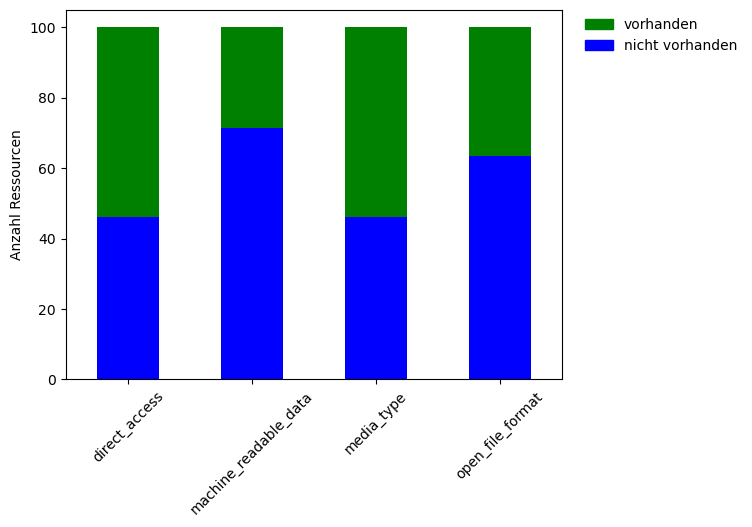

In [30]:
### ### ### ### create legend components
vorhanden = mpatches.Patch(color="green", label="vorhanden")
nicht_vorhanden = mpatches.Patch(color="blue", label="nicht vorhanden")
### ### ### ### create plot basis
plt.figure(figsize=(12, 12))
### ### ### ### create axis
ax = (
    bp_data.groupby(["Group", "index"])
    .agg("sum")
    .unstack()
    .plot(kind="bar", stacked=True, color=["blue", "green"])
)
### ### ### ### add further plot components
plt.xlabel("")
plt.ylabel("Anzahl Ressourcen")
plt.xticks(rotation=45)
plt.legend(
    handles=[vorhanden, nicht_vorhanden],
    loc="lower center",
    bbox_to_anchor=(1.2, 0.85),
    frameon=False,
)

## Subset data and extract resource types

In [31]:
### ### ### ###
df_sub = df[["source", "id", "resource_path"]]
df_sub = df_sub.explode("resource_path")
df_sub["resource_path"] = df_sub["resource_path"].str.lstrip("\\/")
df_sub["resource_path"] = df_sub["resource_path"].str.split("/").str[0]
df_sub = df_sub.drop_duplicates()
### ### ### ###
df_sub

source                                                 id  \
0       aktion-flaeche-uba  https---aktion-flaeche-de-planspiel-innenentwi...   
0       aktion-flaeche-uba  https---aktion-flaeche-de-planspiel-innenentwi...   
1       aktion-flaeche-uba   https---aktion-flaeche-de-das-wallmeroder-modell   
2       aktion-flaeche-uba  https---aktion-flaeche-de-buendnis-bodenwende-...   
2       aktion-flaeche-uba  https---aktion-flaeche-de-buendnis-bodenwende-...   
...                    ...                                                ...   
302365          elwis-gdws  -DE-Schifffahrtsrecht-Binnenschifffahrtsrecht-...   
302366     energieatlas-st  --www-sachsen-anhalt-energie-de-de-energiebera...   
302367     energieatlas-st   --www-sachsen-anhalt-energie-de-de-kommunen-html   
302368     energieatlas-st  --www-sachsen-anhalt-energie-de-de-verbraucher...   
302369     energieatlas-st  --www-sachsen-anhalt-energie-de-de-ladesaeulen...   

       resource_path  
0           Dokument  
0          Unbekannt  
1          Unbekannt  
2           Dokument  
2          Unbekannt  
...              ...  
302365      Webseite  
302366      Webseite  
302367      Webseite  
302368      Webseite  
302369      Webseite  

[482671 rows x 3 columns]

## Group data by resource type and count occurences

In [32]:
### ### ### ###
df_group = (
    df_sub.groupby(["resource_path"])["resource_path"].agg(["count"]).reset_index()
)
df_group
# df_group.to_csv("Gruppierung_Stand_Freitag_07192024.csv")

resource_path   count
0        Archiv   79445
1          Bild    2590
2         Datei  111197
3      Dokument  117626
4    Multimedia     149
5     Unbekannt     793
6     Webdienst   19611
7      Webseite  151260

## Create barplots

In [33]:
### ### ### ### Create barwidth
barWidth = 0.9

### ### ### ### Create figure environment
plt.figure(figsize=(12, 8))

### ### ### ### Create barplot
plt.bar(
    df_group["resource_path"],
    df_group["count"],
    width=barWidth,
    color="#2d5ebd",
    label="Resource type",
)
plt.xlabel("Ressourcen-Typ", size=14)
plt.ylabel("Häufigkeit Ressourcen-Typ", size=14)

### ### ### ### Create text for bar labeling
label = list(df_group["count"])

### ### ### ### Create position for bar labeling
position = [0, 1, 2, 3, 4, 5, 6, 7]

### ### ### ### Text on the top of each bar
for i in range(0, len(df_group)):
    plt.text(
        x=position[i],
        y=df_group["count"][i] + 1000,
        s=label[i],
        size=10,
        horizontalalignment="center",
    )

In [37]:
pd.options.display.max_rows = 200
df_grouped_da = df.groupby(["source", "direct_access"]).size().unstack(fill_value=0)
df_grouped_da = df_grouped_da.div(df_grouped_da.sum(axis=1), axis=0)
df_grouped_da
df_sorted_da = df_grouped_da.sort_values(by=False, ascending=False)

df_dl = df.explode("direct_link")
df_grouped_dl = df_dl.groupby(["source", "direct_link"]).size().unstack(fill_value=0)
df_grouped_dl = df_grouped_dl.div(df_grouped_dl.sum(axis=1), axis=0)
df_sorted_dl = df_grouped_dl.sort_values(by=False, ascending=False)

df_pc = df.explode("primary_content")
df_grouped_pc = (
    df_pc.groupby(["source", "primary_content"]).size().unstack(fill_value=0)
)
df_grouped_pc = df_grouped_pc.div(df_grouped_pc.sum(axis=1), axis=0)
df_sorted_pc = df_grouped_pc.sort_values(by=False, ascending=False)

df_grouped_off = df.groupby(["source", "open_file_format"]).size().unstack(fill_value=0)
df_grouped_off = df_grouped_off.div(df_grouped_off.sum(axis=1), axis=0)
df_sorted_off = df_grouped_off.sort_values(by=False, ascending=False)

df_grouped_mt = df.groupby(["source", "media_type"]).size().unstack(fill_value=0)
df_grouped_mt = df_grouped_mt.div(df_grouped_mt.sum(axis=1), axis=0)
df_sorted_mt = df_grouped_mt.sort_values(by=False, ascending=False)

df_grouped_mrd = (
    df.groupby(["source", "machine_readable_data"]).size().unstack(fill_value=0)
)
df_grouped_mrd = df_grouped_mrd.div(df_grouped_mrd.sum(axis=1), axis=0)
df_sorted_mrd = df_grouped_mrd.sort_values(by=False, ascending=False)

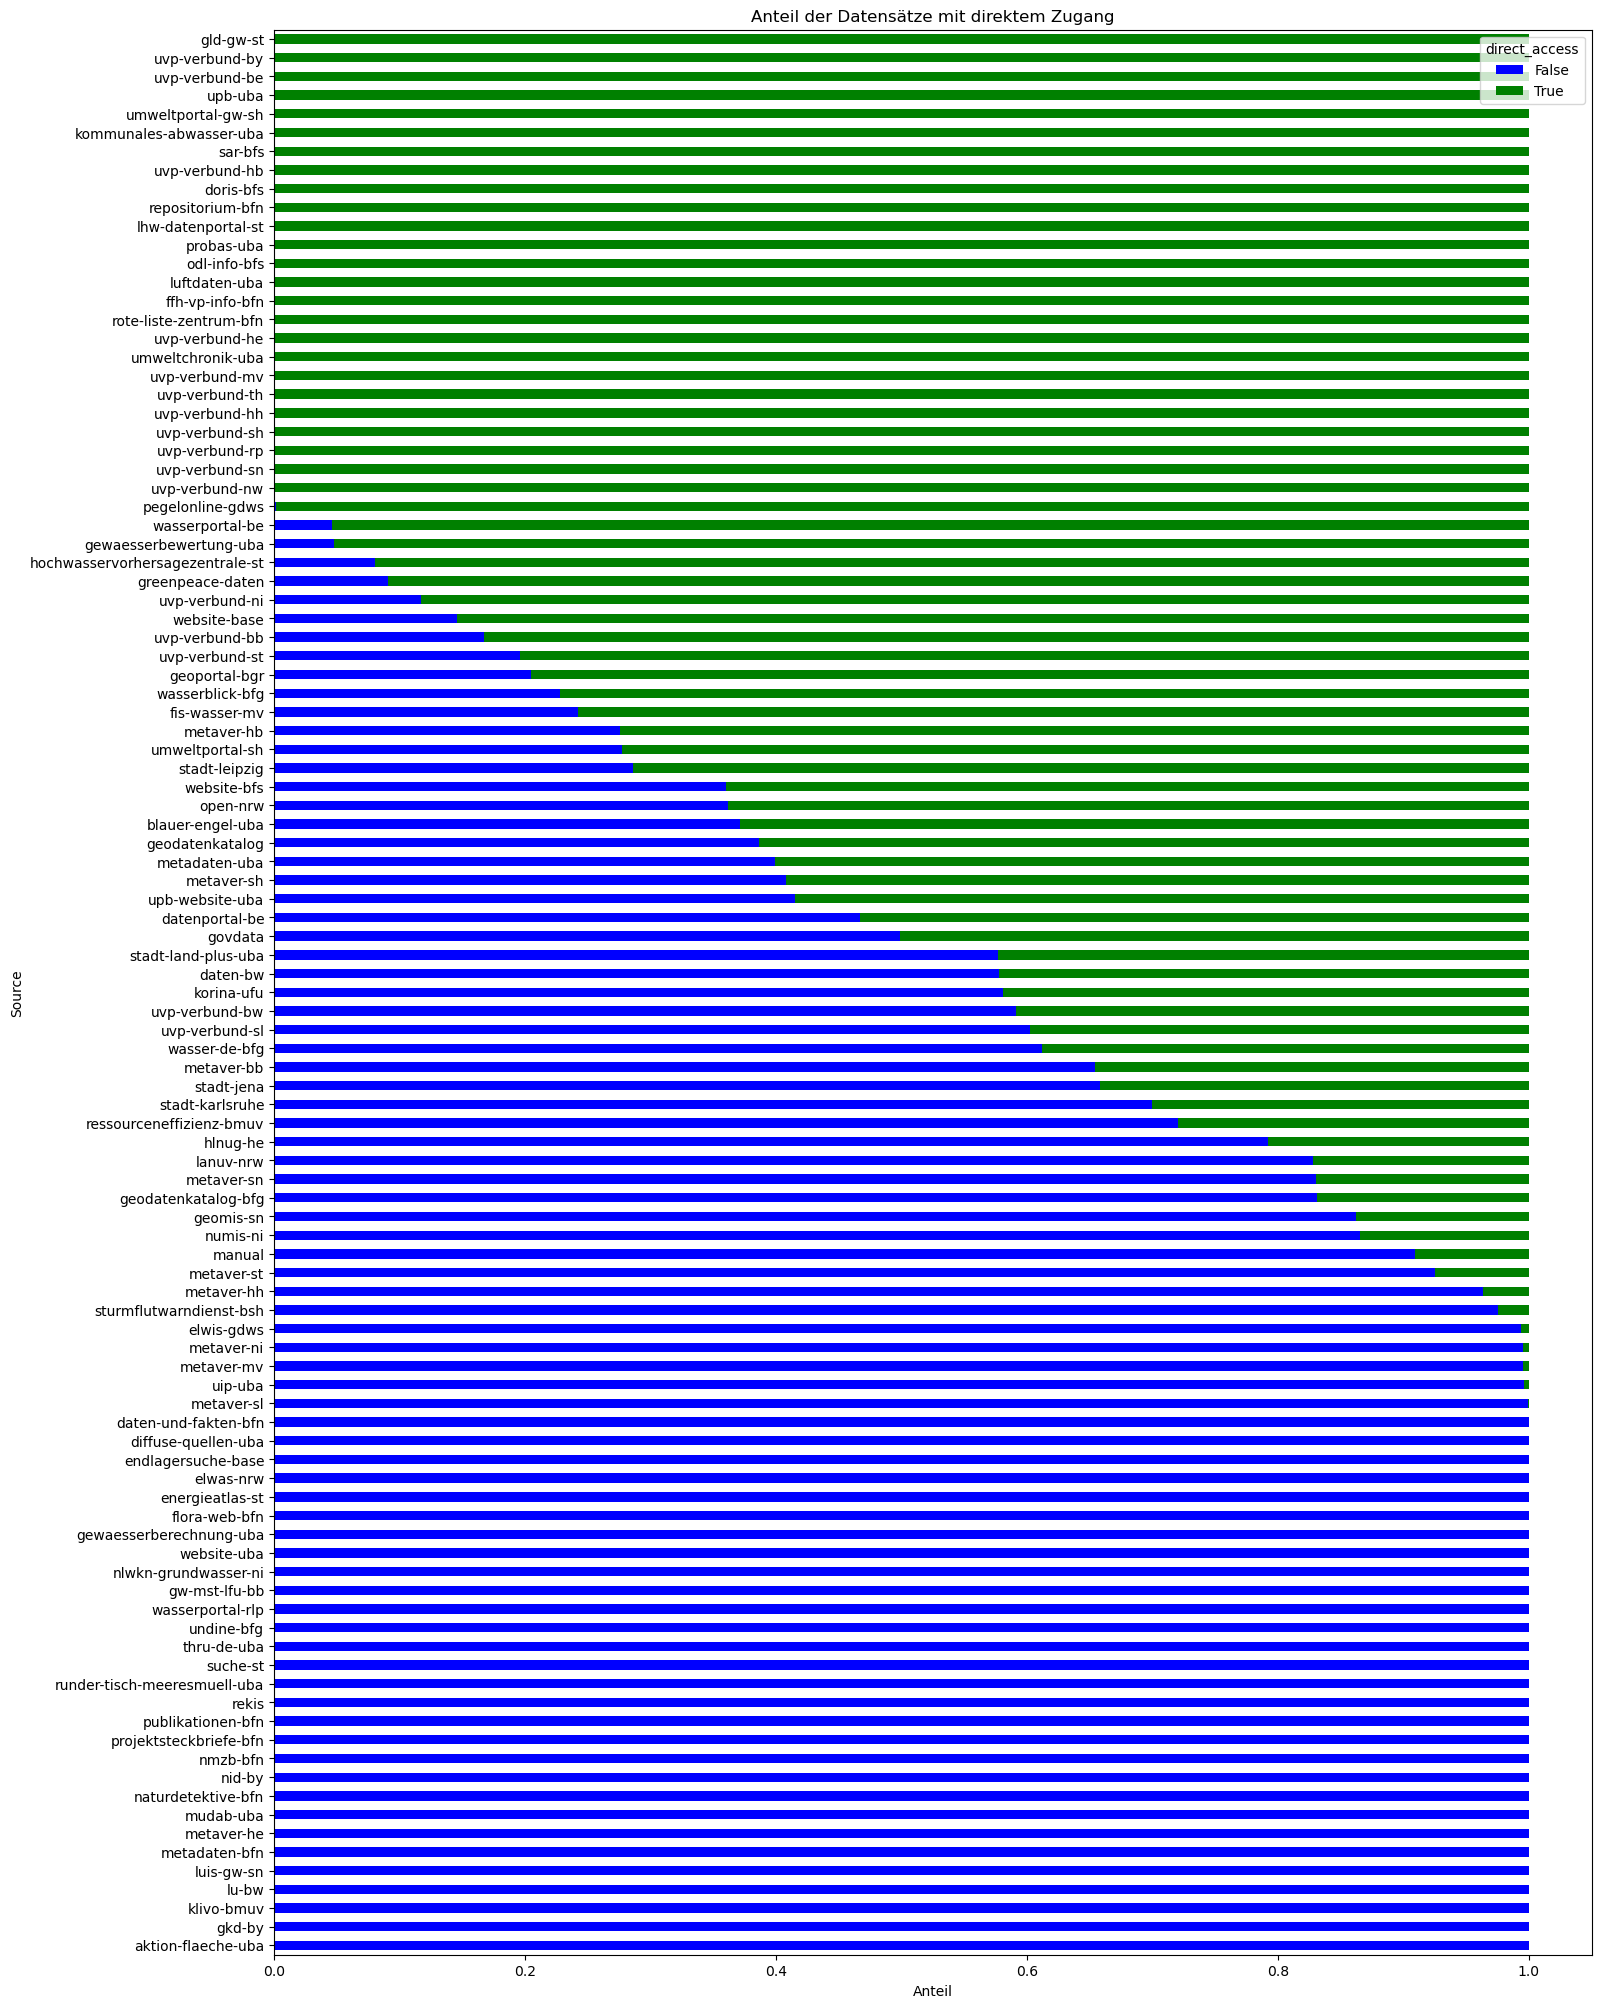

In [39]:
os.mkdir("Plots")

fig, ax = plt.subplots(figsize=(17, 25))
df_sorted_da.plot(kind="barh", stacked=True, color=["blue", "green"], ax=ax)
plt.xlabel("Anteil")
plt.ylabel("Source")
plt.title("Anteil der Datensätze mit direktem Zugang")
plt.legend(["False", "True"], title="direct_access")
plt.savefig("Plots/direct_access.png")

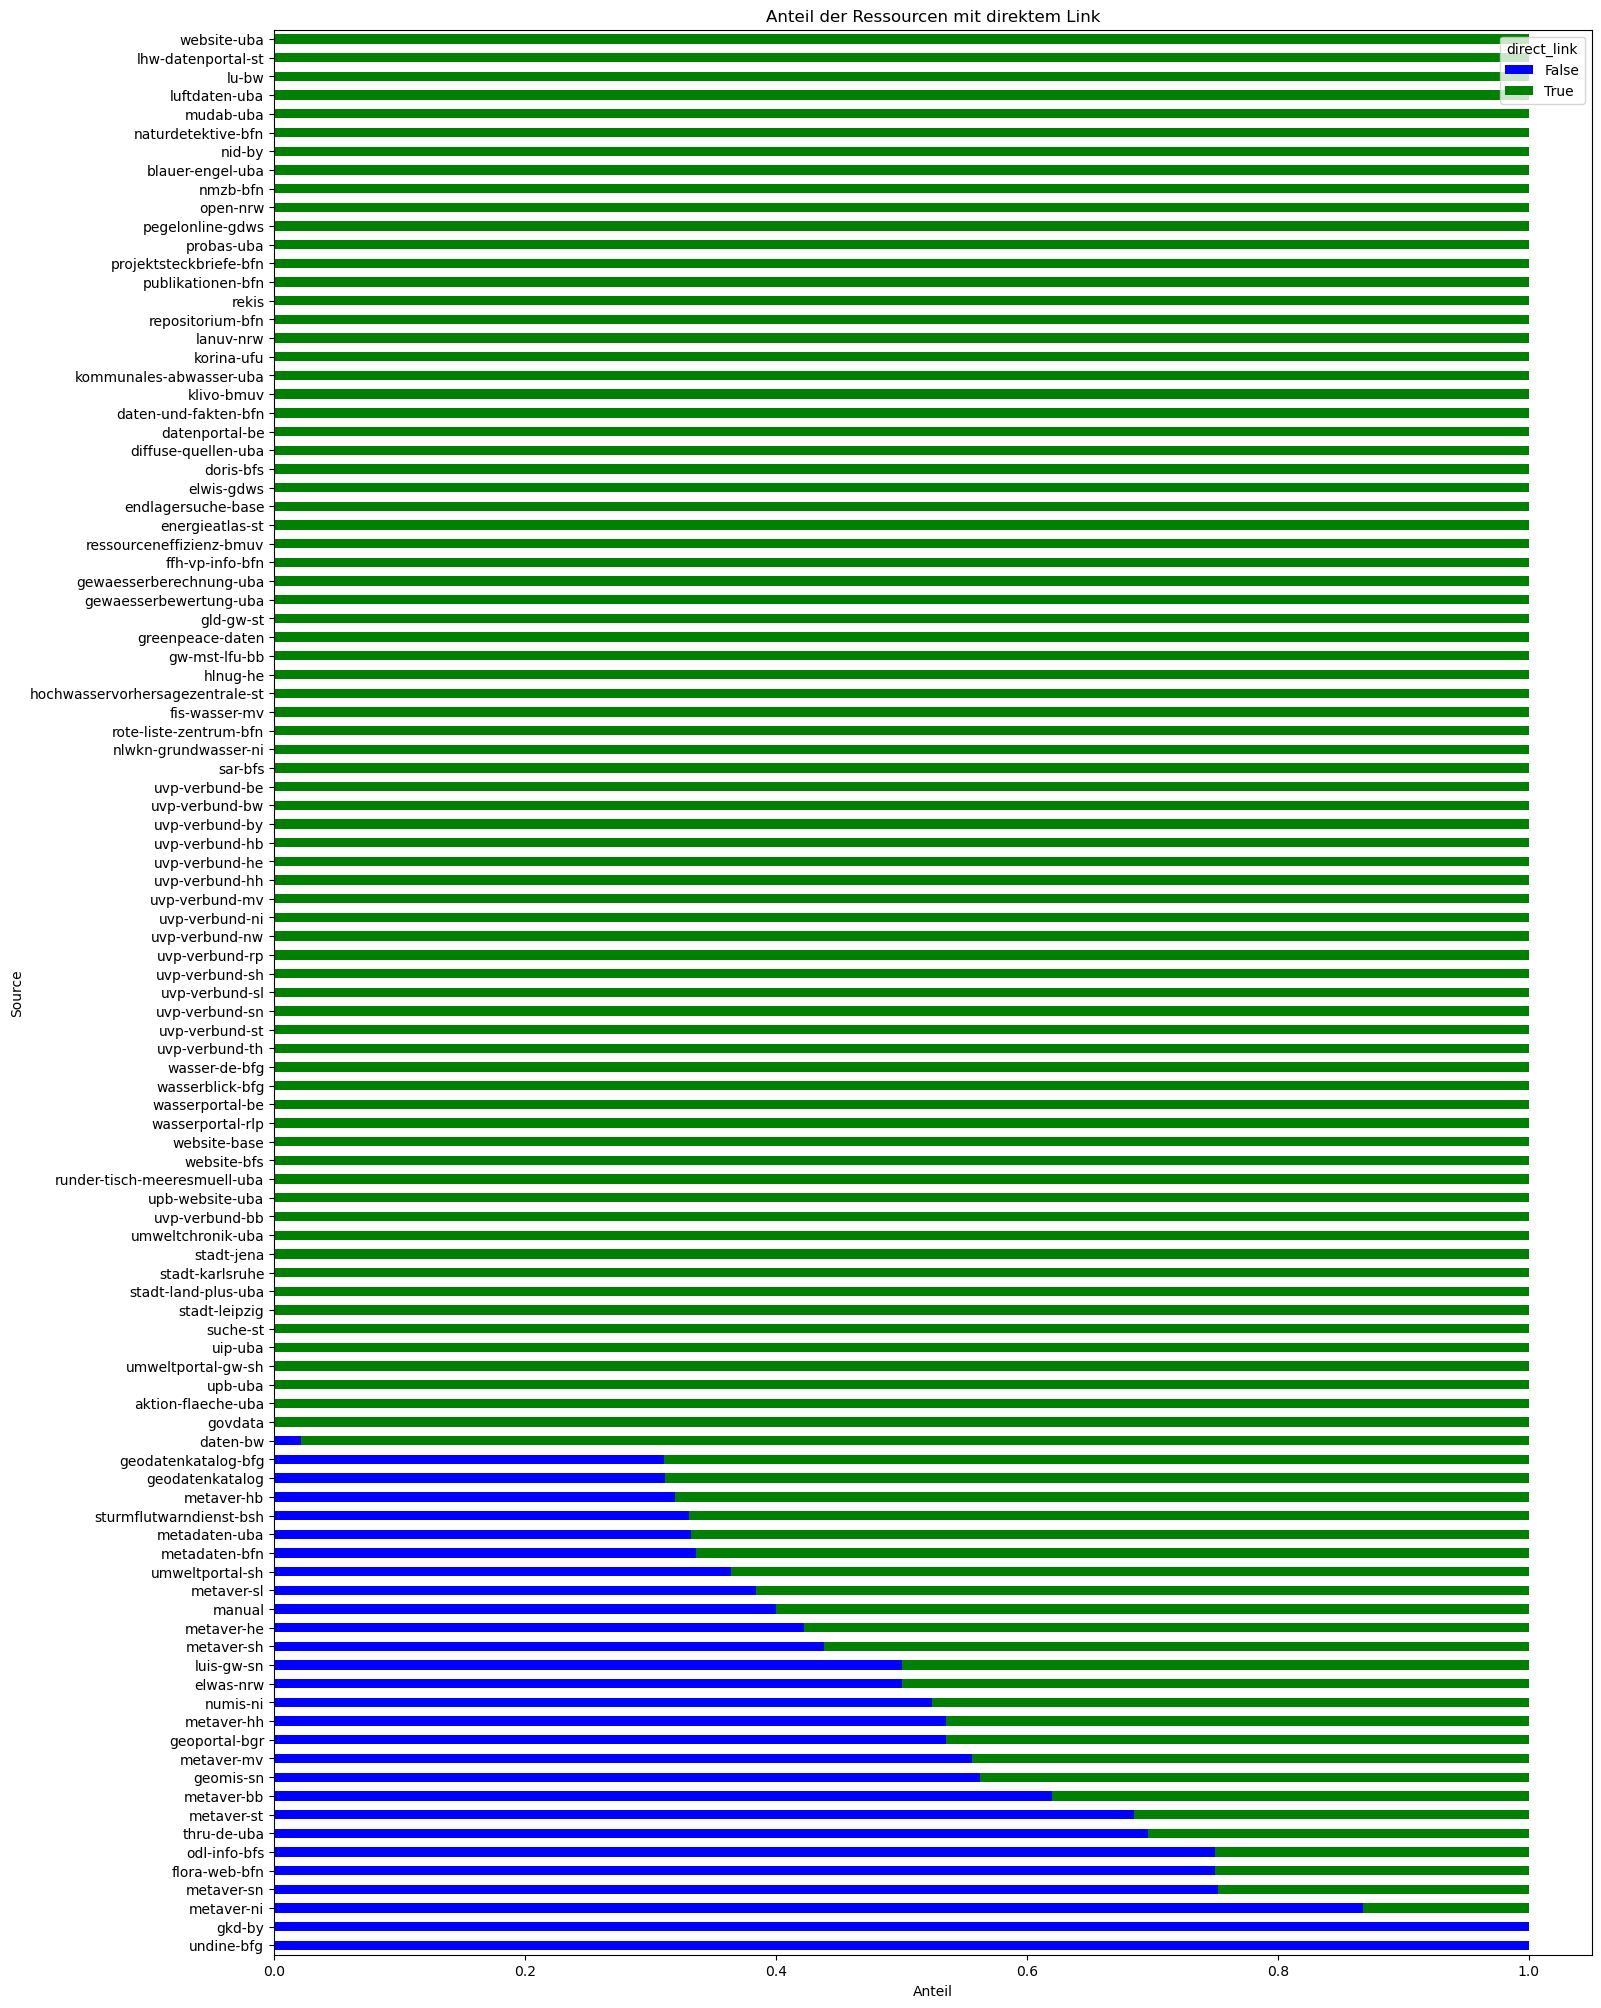

In [40]:
fig, ax = plt.subplots(figsize=(17, 25))
df_sorted_dl.plot(kind="barh", stacked=True, color=["blue", "green"], ax=ax)
plt.xlabel("Anteil")
plt.ylabel("Source")
plt.title("Anteil der Ressourcen mit direktem Link")
plt.legend(["False", "True"], title="direct_link")
plt.savefig("Plots/direct_link.png")

In [41]:
fig, ax = plt.subplots(figsize=(17, 25))
df_sorted_pc.plot(kind="barh", stacked=True, color=["blue", "green"], ax=ax)
plt.xlabel("Anteil")
plt.ylabel("Source")
plt.title("Anteil der Ressourcen mit primären Inhalten")
plt.legend(["False", "True"], title="primary_content")
plt.savefig("Plots/direct_primary_content.png")

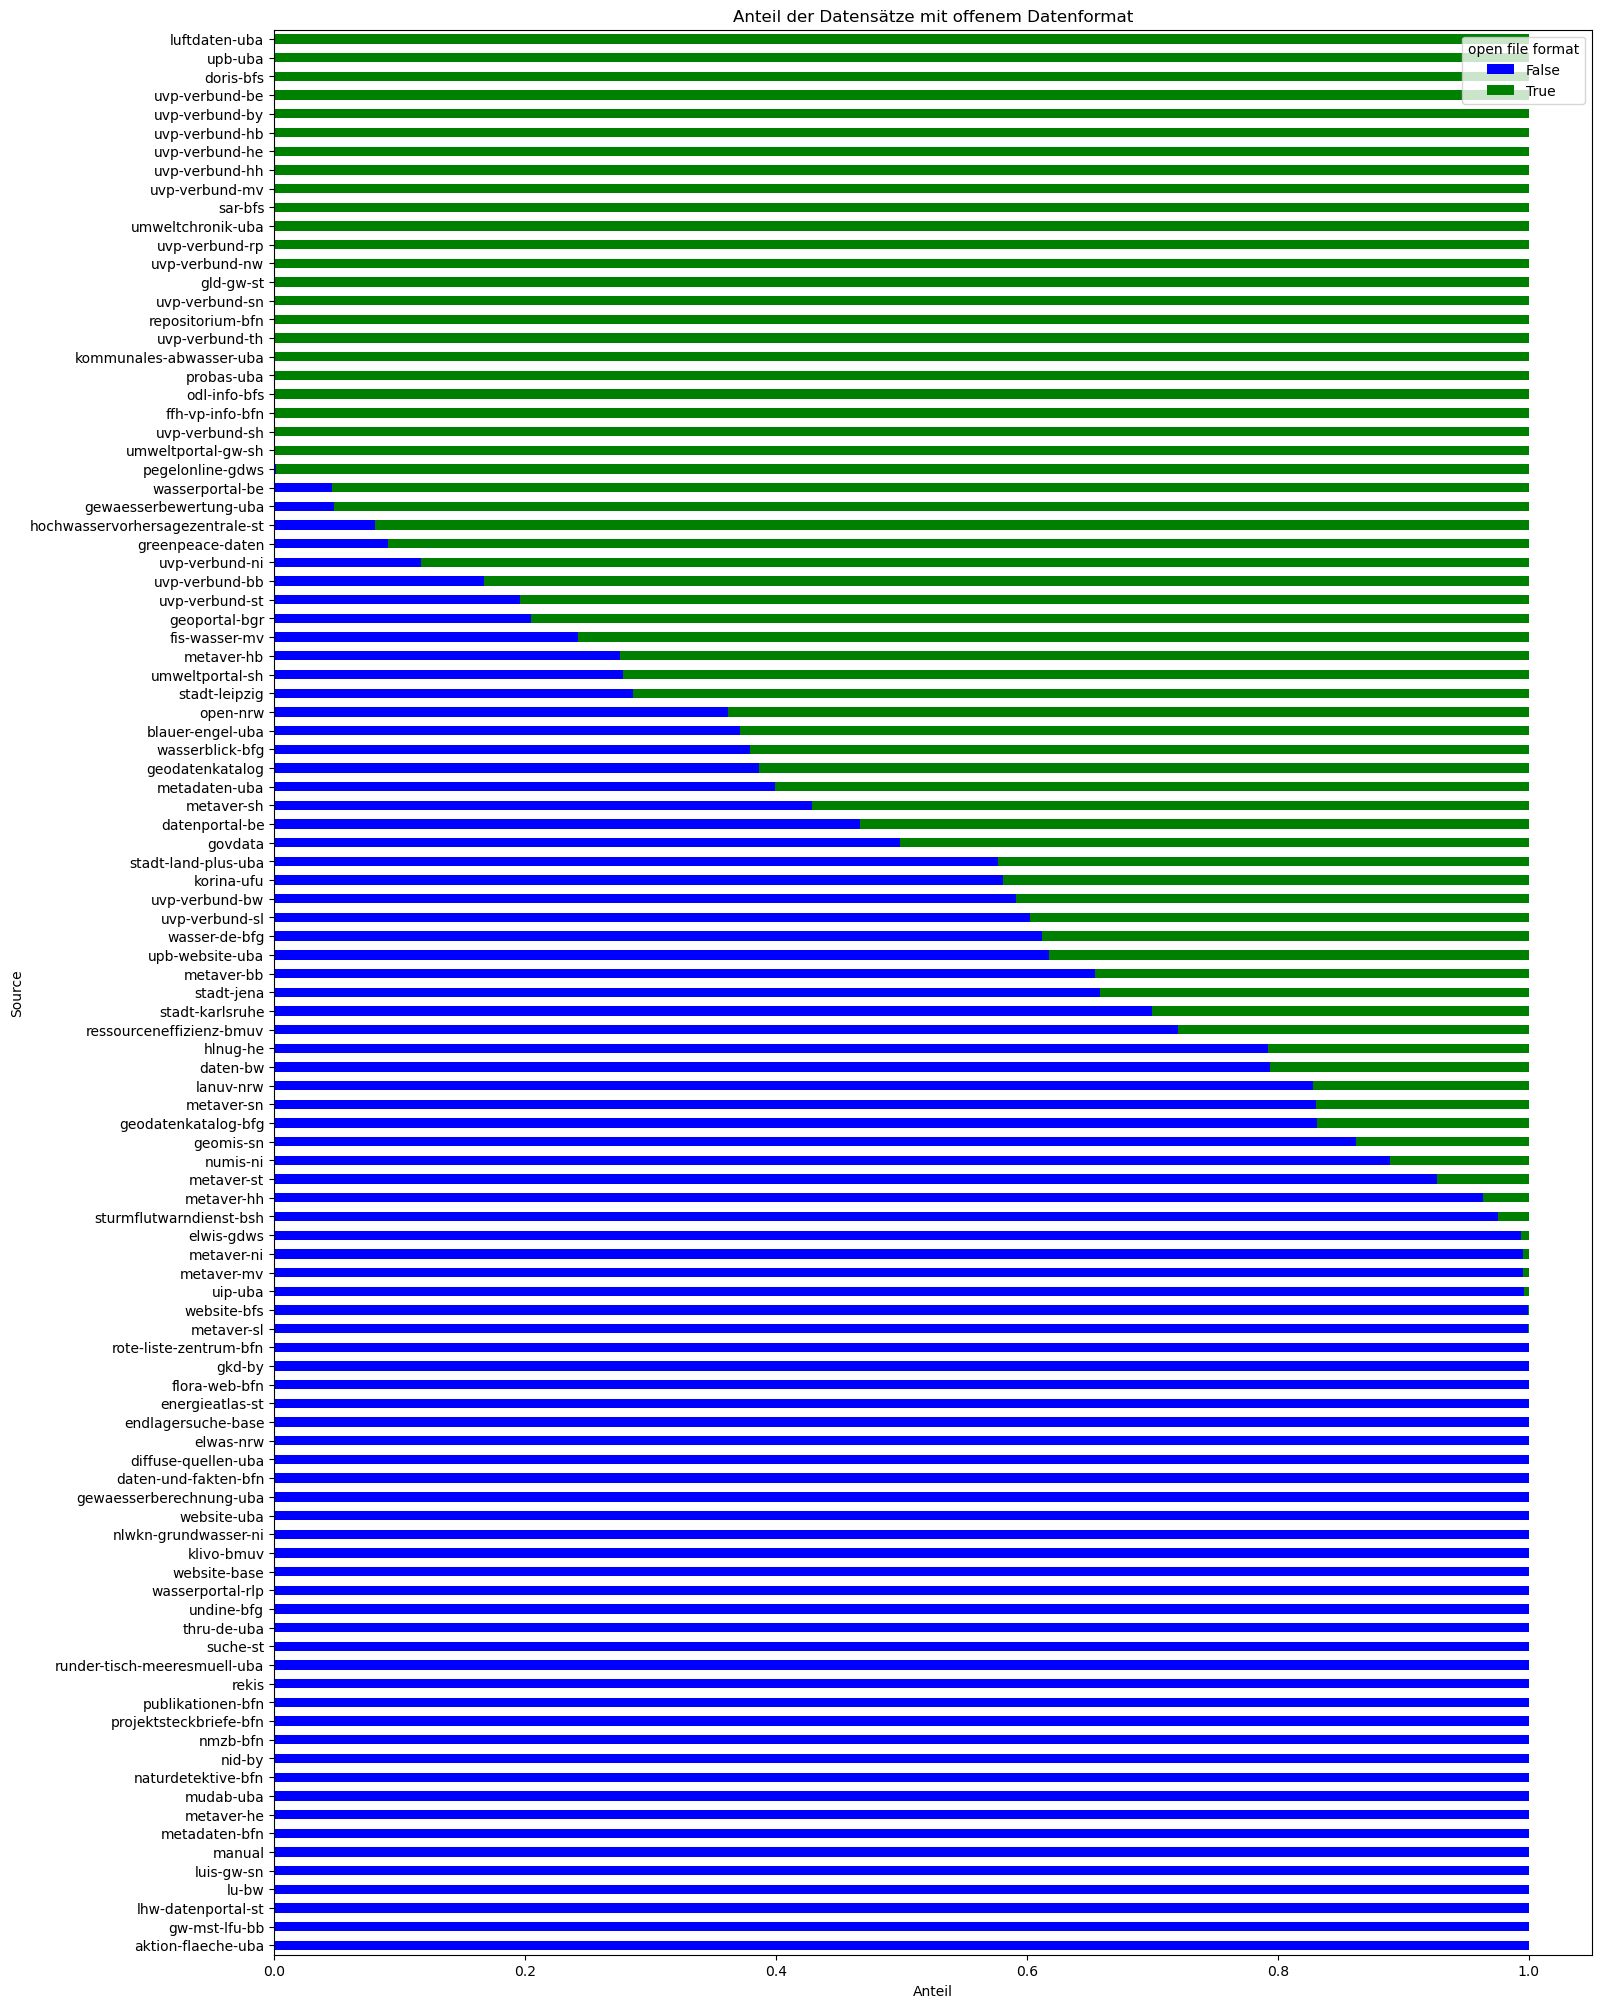

In [42]:
fig, ax = plt.subplots(figsize=(17, 25))
df_sorted_off.plot(kind="barh", stacked=True, color=["blue", "green"], ax=ax)
plt.xlabel("Anteil")
plt.ylabel("Source")
plt.title("Anteil der Datensätze mit offenem Datenformat")
plt.legend(["False", "True"], title="open file format")
plt.savefig("Plots/open_file_format.png")

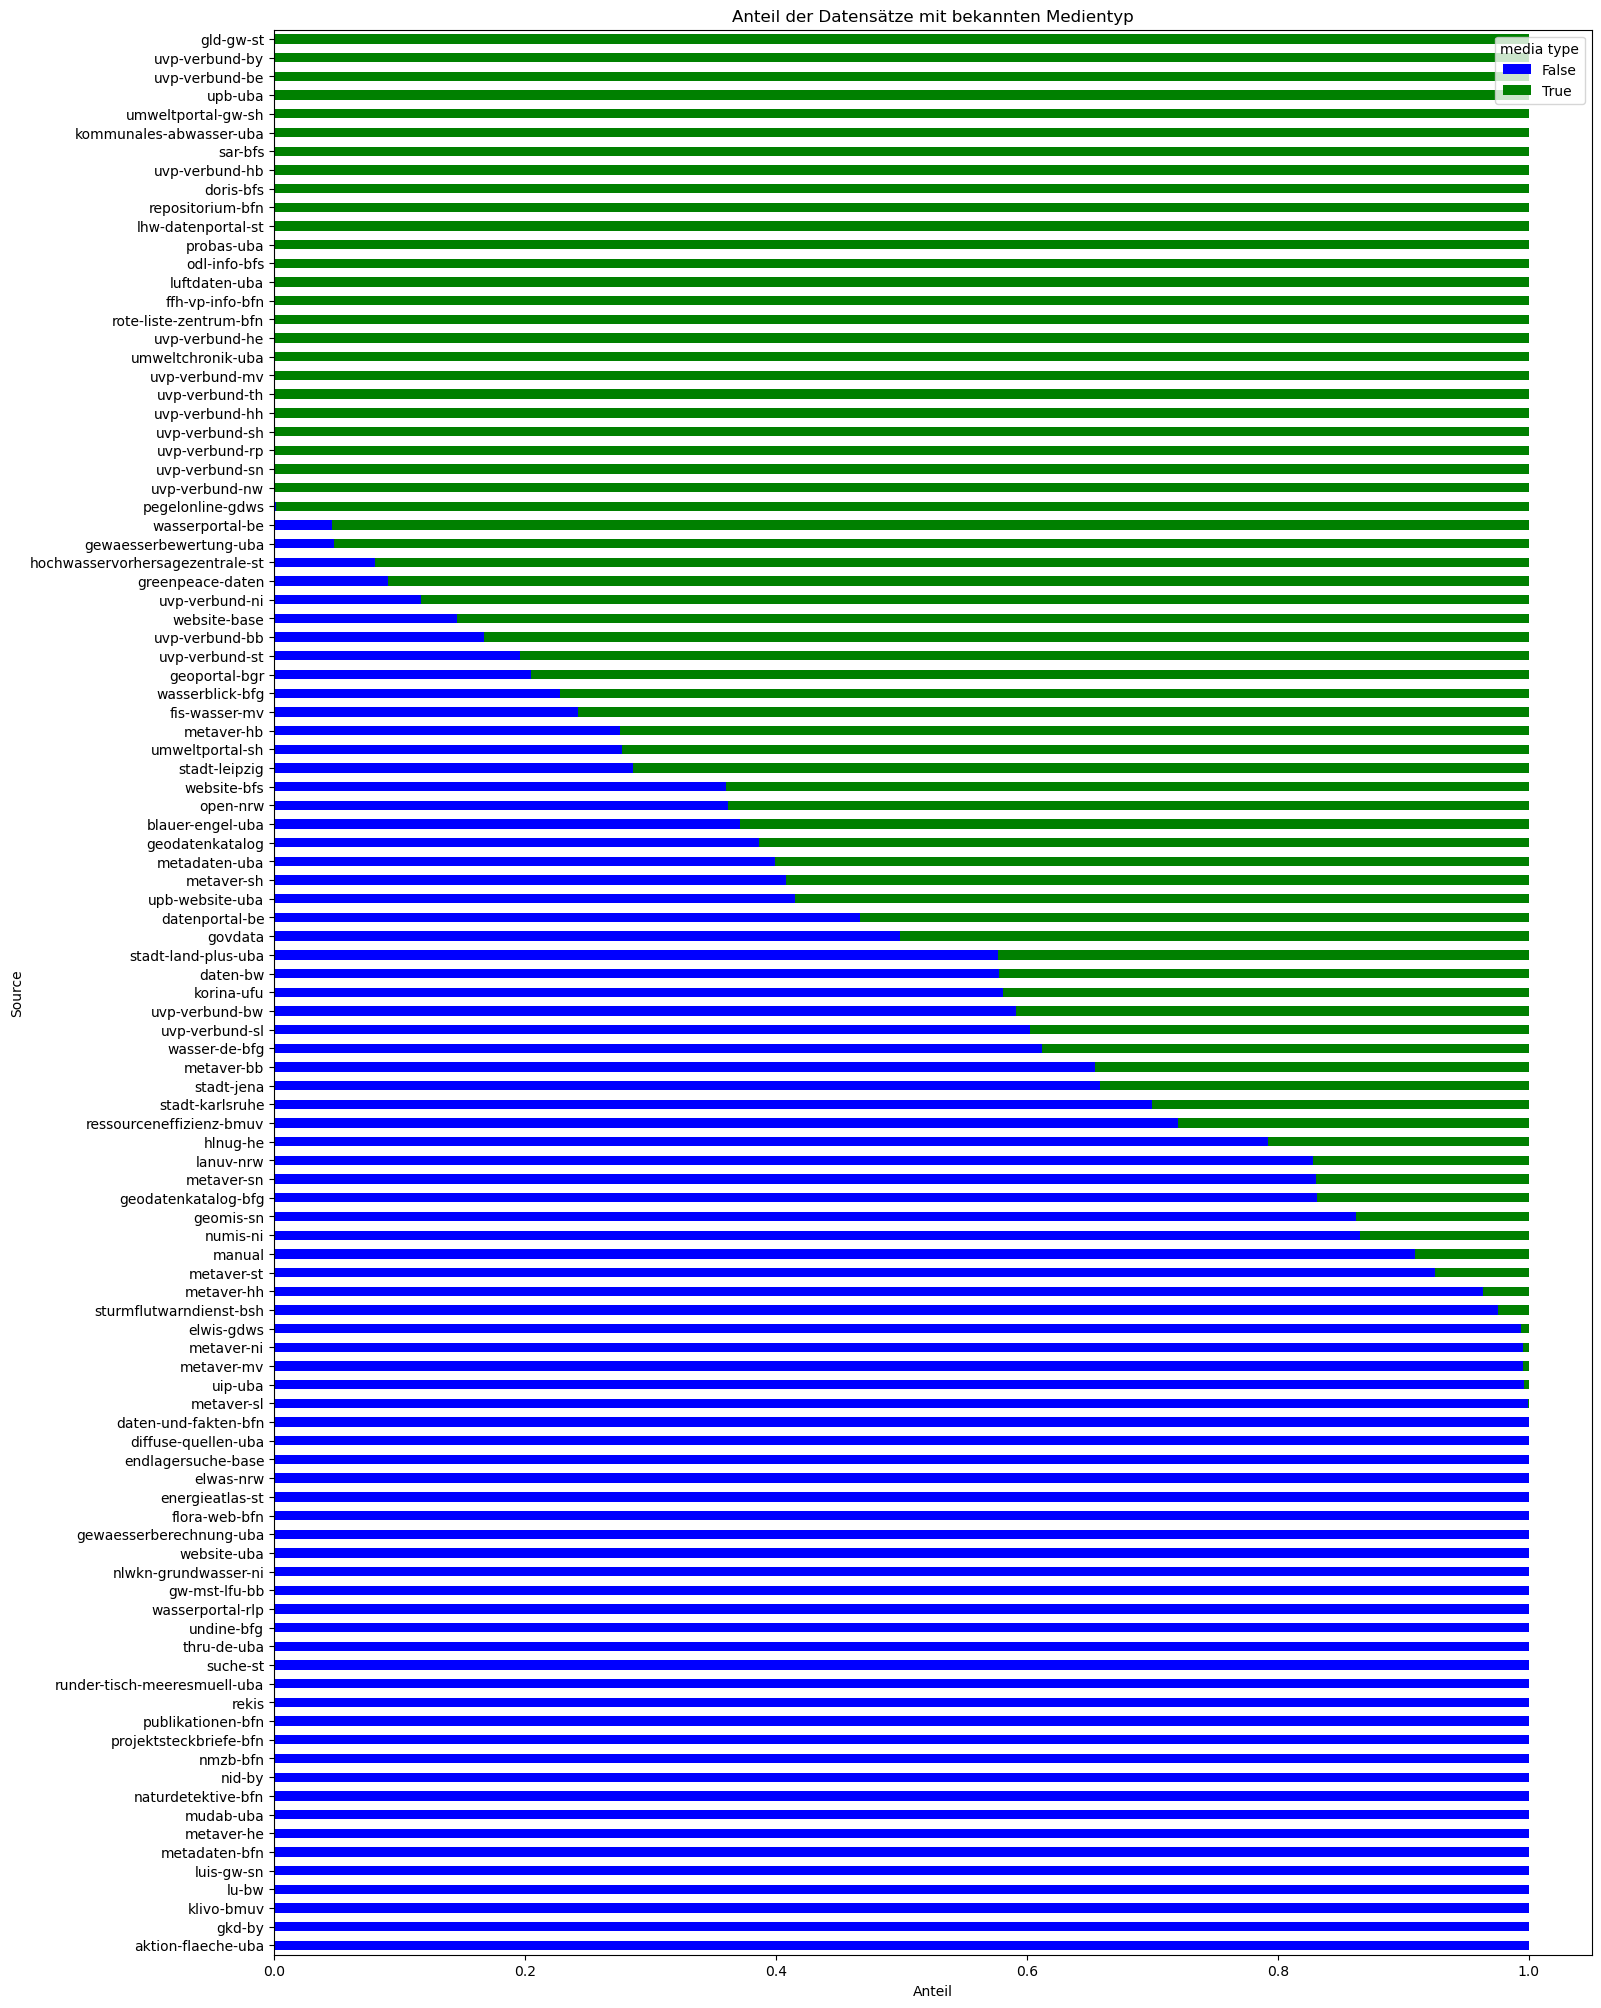

In [43]:
fig, ax = plt.subplots(figsize=(17, 25))
df_sorted_mt.plot(kind="barh", stacked=True, color=["blue", "green"], ax=ax)
plt.xlabel("Anteil")
plt.ylabel("Source")
plt.title("Anteil der Datensätze mit bekannten Medientyp")
plt.legend(["False", "True"], title="media type")
plt.savefig("Plots/media_type.png")

In [44]:
fig, ax = plt.subplots(figsize=(17, 25))
df_sorted_mrd.plot(kind="barh", stacked=True, color=["blue", "green"], ax=ax)
plt.xlabel("Anteil")
plt.ylabel("Source")
plt.title("Anteil der maschinenlesbaren Datensätze")
plt.legend(["False", "True"], title="machine readable data")
plt.savefig("Plots/machine_readable_data.png")